# PiML Toolbox: Save and Load Models

This example notebook demonstrates how to use PiML to save a fitted model to pickle file and load a pickle file into PiLM workflow.

# Install PiML package on Google Colab

1. Run `!pip install piml` to install the latest version of PiML
2. In Colab, you'll need restart the runtime in order to use newly installed PiML version.

In [1]:
!pip install piml

# Initialize an experiment, Load and Prepare data

In [2]:
from piml import Experiment
exp = Experiment(highcode_only=True)
exp.data_loader(data="BikeSharing", silent=True)

In [3]:
exp.data_summary(silent=True)

In [4]:
exp.data_prepare(silent=True)

# Save a fitted model to pickle file

In [5]:
from xgboost import XGBRegressor
exp.model_train(XGBRegressor(max_depth=1), name="XGB1")

In [6]:
exp.model_save(model="XGB1", path="BikeSharing-XGB.pkl")

# Load and register a fitted model from pickle

In [7]:
pipeline = exp.make_pipeline(model="BikeSharing-XGB.pkl")
exp.register(pipeline, name="XGB1-load")

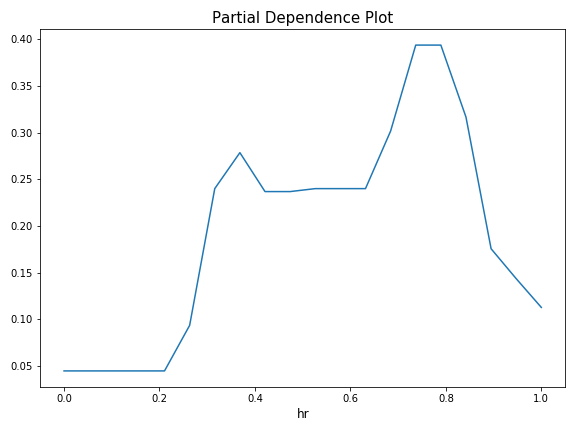

In [8]:
exp.model_explain(model="XGB1-load", show="pdp", uni_feature="hr")